## Library yang akan digunakan

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memanggil dataset

In [12]:
df = pd.read_csv('Pizza_Sales.csv')

## 1. BUSINESS UNDERSTANDING

Business Understanding merupakan pengumpulan data perihal Business objective, peniliaian terkait kondisi terkini, menetapkan tujuan dari proses data mining, dan mengembangkan rencana proyek.

Harga pizza bervariasi berdasarkan Ukuran pizza yang dipesan. Misalnya, sepotong kecil  pizza keju menu standar Sedangkan sepotong pizza keju spesial bisa lebih mahal harganya. Melihat besarnya ukuran pizza yang dipesan, maka harga akan berbeda sesuai ukuran yang dipesan. 

Tujuan saya mengambil data ini adalah untuk mengetahui estimasi jumlah penjualan, saya mendapatkan datasets berikut link datasetsnya : https://www.kaggle.com/datasets/shilongzhuang/pizza-sales



## 2. DATA UNDERSTANDING

Data understanding adalah sebuah tahapan di dalam metodologi sains data dan pengembangan AI yang bertujuan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan bisnis yang diberikan.

 

## Deskripsi dataset

In [13]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# DATA PREPARATION

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


## Mencari heatmap

<AxesSubplot:>

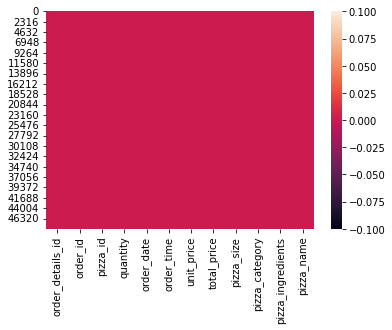

In [15]:
sns.heatmap(df.isnull())

## Melihat Nilai Data

In [16]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


## Visualisasi Data

<AxesSubplot:>

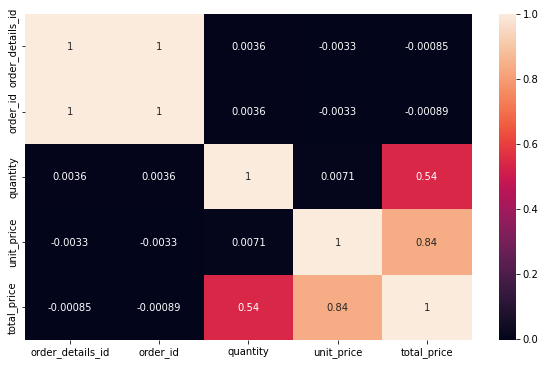

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

## Jumlah Pizza Berdasarkan Ukuran

In [31]:
brands = df.groupby('pizza_name').count()[['pizza_size']].sort_values(by='pizza_size', ascending=True).reset_index()
brands = brands.rename(columns={'pizza_size':'quantity'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'The Brie Carre Pizza'),
  Text(1, 0, 'The Mediterranean Pizza'),
  Text(2, 0, 'The Calabrese Pizza'),
  Text(3, 0, 'The Spinach Supreme Pizza'),
  Text(4, 0, 'The Soppressata Pizza'),
  Text(5, 0, 'The Spinach Pesto Pizza'),
  Text(6, 0, 'The Chicken Pesto Pizza'),
  Text(7, 0, 'The Italian Vegetables Pizza'),
  Text(8, 0, 'The Chicken Alfredo Pizza'),
  Text(9, 0, 'The Green Garden Pizza'),
  Text(10, 0, 'The Pepperoni, Mushroom, and Peppers Pizza'),
  Text(11, 0, 'The Five Cheese Pizza'),
  Text(12, 0, 'The Greek Pizza'),
  Text(13, 0, 'The Italian Capocollo Pizza'),
  Text(14, 0, 'The Pepper Salami Pizza'),
  Text(15, 0, 'The Prosciutto and Arugula Pizza'),
  Text(16, 0, 'The Spinach and Feta Pizza'),
  Text(17, 0, 'The Napolitana Pizza'),
  Text(18, 0, 'The Mexicana Pizza'),
  Text(19, 0, 'The Vegetables + Vegetables Pizza')

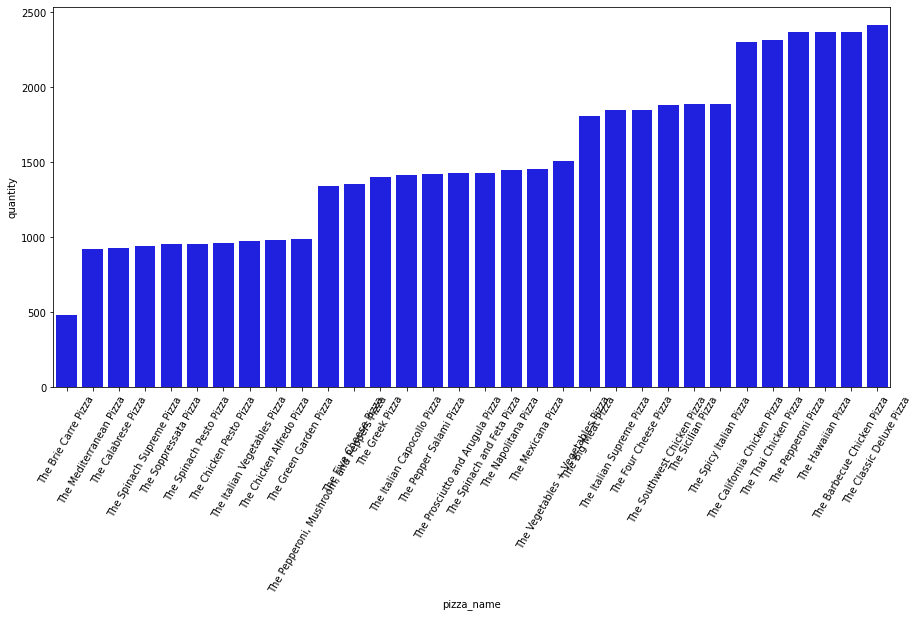

In [32]:
fig = plt.figure(figsize = (15,7))
sns.barplot(x = brands['pizza_name'], y = brands['quantity'], color = 'blue')
plt.xticks(rotation = 60)

# MODELLING DATA

## Seleksi Fitur

In [33]:
fitur = ['order_id', 'quantity', 'unit_price']
x = df[fitur]
y = df['total_price']
x.shape, y.shape

((48620, 3), (48620,))

## Split Data Training & Testing

In [34]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 70)
y_test.shape

(12155,)

## membuat regresi linier

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# EVALUTION DATA

In [36]:
y = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  0.9875783508224953


## Membuat inputan regresi linier

In [38]:
inputan = np.array([[7, 1, 12.5]])
prediksi = lr.predict(inputan)
print('Estimasi Jumlah Penjualan Pizza : ', prediksi)

Estimasi Jumlah Penjualan Pizza :  [12.42462095]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

## Save Model

In [39]:
import pickle
filename = 'estimasi_pizza.sav'
pickle.dump(lr,open(filename,'wb'))